In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv('./datasets/bdiag.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
selected_features = ['radius_mean', 'texture_mean']

In [5]:
X = np.asarray(df[selected_features], dtype=np.float32)
y = np.asarray(df['diagnosis'], dtype=np.object0).reshape(-1, 1)

In [6]:
X

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]], dtype=float32)

In [7]:
labels = LabelBinarizer()
y = labels.fit_transform(y)
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [8]:
sc = StandardScaler()
X_data = sc.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)

In [10]:
pipe = DecisionTreeClassifier(splitter="best")
# pipe = RandomForestClassifier()
pipe.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
pipe.score(X_test, y_test)

0.8771929824561403

In [12]:
pipe.score(X_train, y_train)

1.0

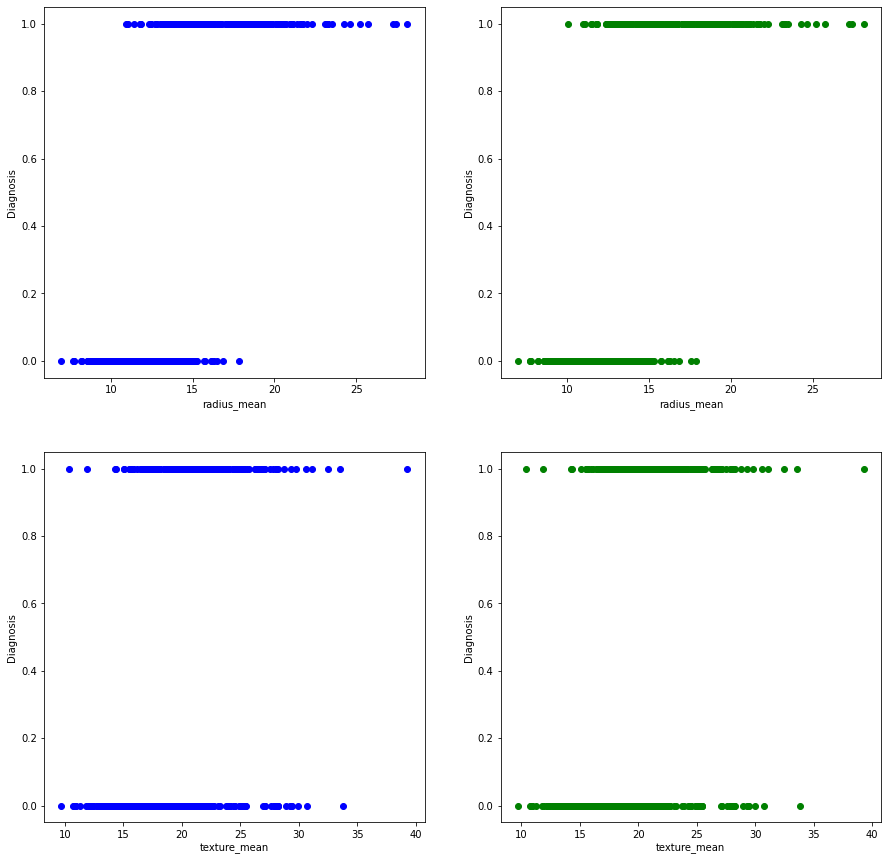

In [13]:
fig, ax = plt.subplots(2, 2)
fig.set_facecolor('white')
fig.set_figheight(15)
fig.set_figwidth(15)

j = 0
for i in selected_features:
  ax[j,0].scatter(y=y, x=df[i], color='blue')
  ax[j,0].set(xlabel=i, ylabel='Diagnosis')

  ax[j,1].scatter(y=pipe.predict(X_data), x=df[i], color='green')
  ax[j,1].set(xlabel=i, ylabel='Diagnosis')

  j += 1
plt.show()

In [14]:
cf_matrix = confusion_matrix(y, pipe.predict(X_data))
cf_matrix

array([[347,  10],
       [  4, 208]], dtype=int64)

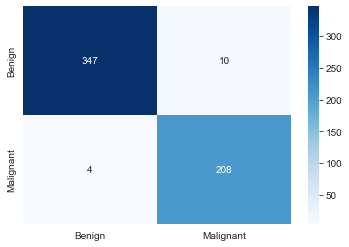

In [15]:
sns.set_style("white")
heatmap = sns.heatmap(cf_matrix, cmap="Blues", annot=True, fmt="")
heatmap.xaxis.set_ticklabels(['Benign', 'Malignant'])
heatmap.yaxis.set_ticklabels(['Benign', 'Malignant'])
plt.show()

In [16]:
tn, fn, tp, fp = cf_matrix.flatten()
tn, fn, tp, fp

(347, 10, 4, 208)

In [17]:
precision_score(y, pipe.predict(X_data))

0.9541284403669725

In [18]:
recall_score(y, pipe.predict(X_data))

0.9811320754716981

In [19]:
f1_score(y, pipe.predict(X_data))

0.9674418604651164